PREDICCION DEL CONSUMO ENERGETICO EN FUNCION DE LA TEMPERATURA

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



In [3]:
df= pd.read_csv('/content/drive/MyDrive/df/DatosTemperatura.csv')

1. ANALISIS EXPLORATORIO DE DATOS

In [6]:
df.head()

,Temperature,EnergyConsumption
0,14.981605,47.889247
1,38.028572,103.576394
2,29.279758,83.658198
3,23.946339,59.928004
4,6.240746,24.503505


In [5]:
df= df.drop(columns=['No'])

In [7]:
df.describe()

,Temperature,EnergyConsumption
count,100.000000,100.000000
mean,18.807230,57.012673
std,11.899576,29.413357
min,0.220885,9.925608
25%,7.728030,31.926021
50%,18.565698,54.728704
75%,29.208125,83.675376
max,39.475477,112.597808


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        100 non-null    float64
 1   EnergyConsumption  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [9]:
df.isnull().sum()

,0
Temperature,0
EnergyConsumption,0


2. DIAGRAMA DE DISPERSION

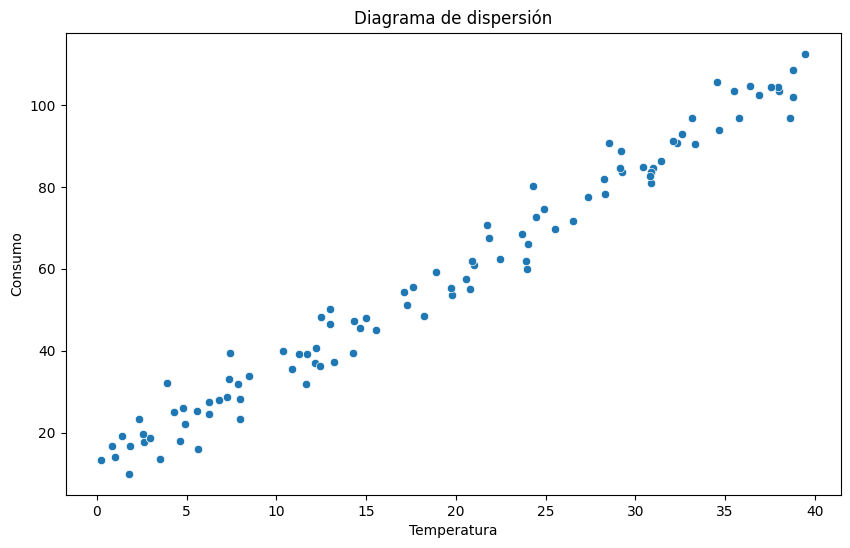

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Temperature'], y=df['EnergyConsumption'], data=df)
plt.title('Diagrama de dispersión')
plt.xlabel('Temperatura')
plt.ylabel('Consumo')
plt.show()

MATRIZ DE CORRELACION

In [12]:
df.corr()

,Temperature,EnergyConsumption
Temperature,1.000000,0.988158
EnergyConsumption,0.988158,1.000000


Division del conjunto de Datos en entrenamiento y prueba

In [20]:
from sklearn.model_selection import train_test_split
X= df[['Temperature']]
y= df['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ENTRENAMIENTO DEL MODELO DE REGRESION LINEAL

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([ 16.94285505,  98.40159484,  86.38933097,  75.63726954,
        36.07325456,  53.84653405,  39.34276626,  95.2928648 ,
        12.73170782,  47.41696507,  53.042257  ,  70.249853  ,
        90.62427127, 103.69893153,  22.43399383,  26.00333814,
        86.29384414,  17.97044167,  92.28831523,  27.42477739])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print('MSE', np.sqrt(mse))
print('R2', r2)

MSE 4.042584302513068
R2 0.9825431689004598


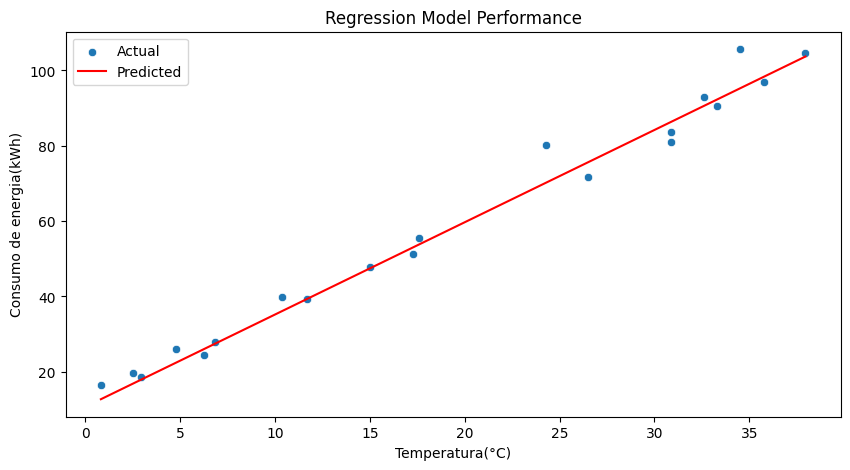

In [28]:
# Visualización de resultados: comparando los valores reales y las predicciones
plt.figure(figsize=(10, 5))  # Establecemos el tamaño de la figura para los gráficos
sns.scatterplot(x=X_test['Temperature'], y=y_test, label='Actual')  # Graficamos los valores reales (dispersión)
sns.lineplot(x=X_test['Temperature'], y=y_pred, color='red', label='Predicted')  # Graficamos las predicciones (línea roja)
plt.xlabel('Temperatura(°C)')  # Etiqueta para el eje X
plt.ylabel('Consumo de energia(kWh)')  # Etiqueta para el eje Y
plt.title('Regression Model Performance')  # Título del gráfico
plt.legend()  # Mostramos la leyenda
plt.show()  # Mostramos el gráfico

CALCULO DE RESIDUOS

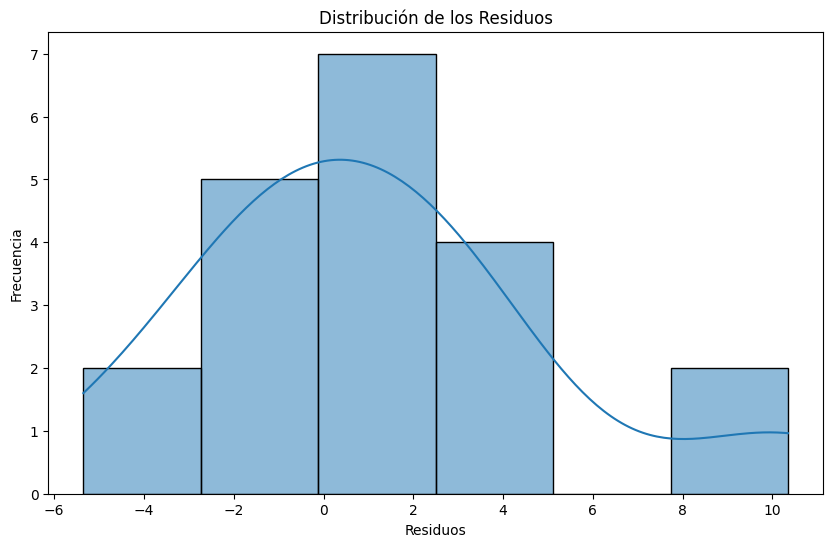

In [29]:
residuals = y_test -y_pred
# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # Histograma con estimación de densidad
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()


In [34]:
intercepto = model.intercept_
pendiente = model.coef_[0]
print("Intercepto: (b0)", intercepto)
print("Pendiente:  (b1)", pendiente)

Intercepto: (b0) 10.714566597292823
Pendiente:  (b1) 2.4498309143700694


In [35]:
print(f"La ecuación de la recta es: y = {intercepto:.2f} + {pendiente:.2f} * x")

La ecuación de la recta es: y = 10.71 + 2.45 * x


In [39]:
temp_imput= float(input("Introduzca la temperatura: "))
temp_df = pd.DataFrame([[temp_imput]],columns=['Temperature'])
temp_df

Introduzca la temperatura: 120


,Temperature
0,120.0


In [40]:
prediccion_consumo = model.predict(temp_df)
print(f"La predicción de consumo para una temperatura de {temp_imput}°C es: {prediccion_consumo[0]:.2f} kWh")

La predicción de consumo para una temperatura de 120.0°C es: 304.69 kWh
